In [1]:
from fastdownload import FastDownload
from PIL import Image
from torchvision import transforms as tfms
import torch
import numpy as np
import matplotlib.pyplot as plt
from inspect import signature
%matplotlib inline

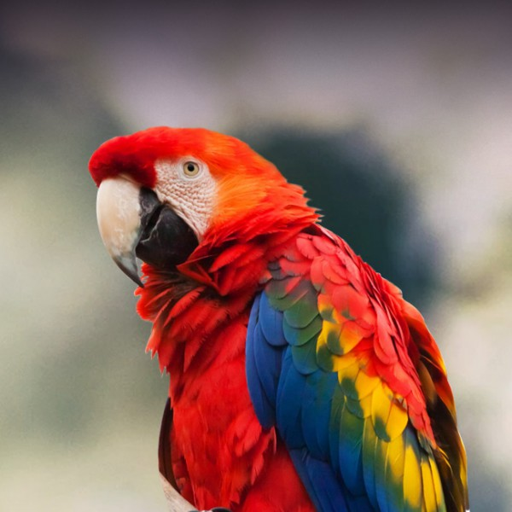

In [2]:
p = FastDownload().download('https://lafeber.com/pet-birds/wp-content/uploads/2018/06/Scarlet-Macaw-2.jpg')
img = Image.open(p).convert('RGB').resize((512,512))
img

In [3]:
from diffusers import AutoencoderKL
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae", torch_dtype=torch.float16).to("cuda")

In [24]:
init_image = tfms.ToTensor()(img).unsqueeze(0) * 2.0 - 1.0
init_image = init_image.to(device="cuda", dtype=torch.float16)
encoded = vae.encode(init_image)
latents = encoded.latent_dist.sample() * 0.18215

In [36]:
print(encoded)
print(encoded.latent_dist.parameters.shape)
print(latents.shape)

AutoencoderKLOutput(latent_dist=<diffusers.models.vae.DiagonalGaussianDistribution object at 0x7fc90b7a4bd0>)
torch.Size([1, 8, 64, 64])
torch.Size([1, 4, 64, 64])


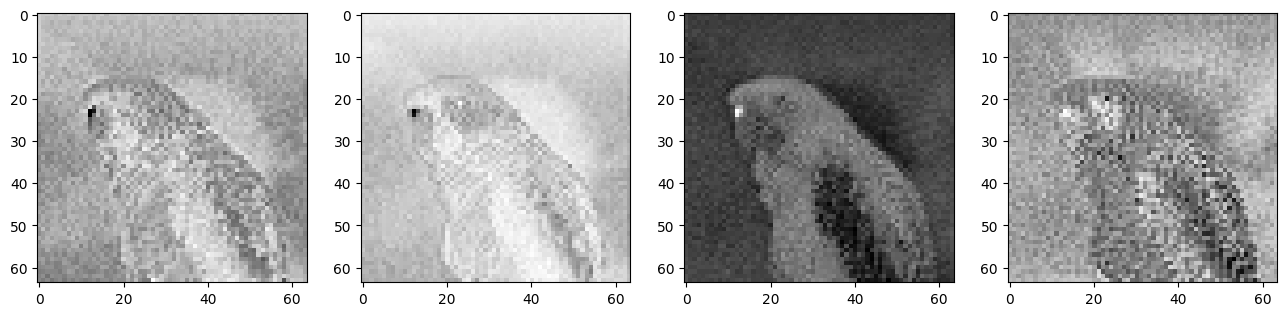

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for c in range(4):
    axs[c].imshow(latents[0][c].detach().cpu(), cmap='Greys')

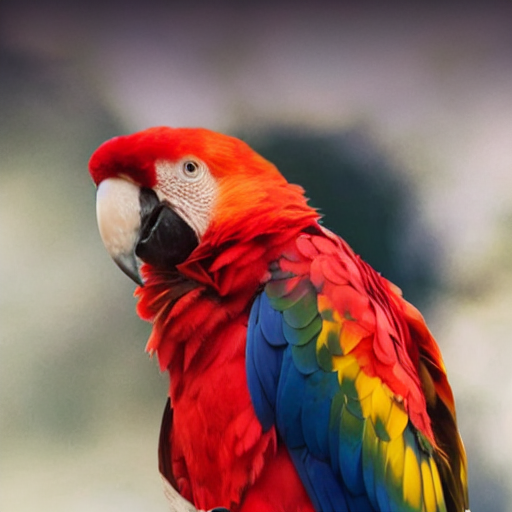

In [9]:
latents = (1 / 0.18215) * latents
with torch.no_grad():
    image = vae.decode(latents).sample
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

In [ ]:
import gc
# del init_latent_dist
# del init_image
# del vae
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

In [10]:
vae

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, ep

In [18]:
print(img.info)
print(img.getpixel((0,0)))

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1), 'comment': b'CREATOR: gd-jpeg v1.0 (using IJG JPEG v90), quality = 90\n'}
(46, 39, 47)


In [23]:
tens = tfms.ToTensor()(img)
print(tens.shape)
print(tens.unsqueeze(0).shape)
tens = tens.unsqueeze(0) * 2 - 1
print(tens)

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])
tensor([[[[-0.6392, -0.6392, -0.6392,  ..., -0.5216, -0.5216, -0.5137],
          [-0.6314, -0.6314, -0.6314,  ..., -0.5216, -0.5216, -0.5137],
          [-0.6314, -0.6235, -0.6235,  ..., -0.5137, -0.5137, -0.5137],
          ...,
          [ 0.6941,  0.6941,  0.6941,  ...,  0.0745,  0.0980,  0.1373],
          [ 0.6941,  0.6941,  0.6941,  ...,  0.0667,  0.0902,  0.1216],
          [ 0.6941,  0.6941,  0.6941,  ...,  0.0588,  0.0902,  0.1137]],

         [[-0.6941, -0.6941, -0.6941,  ..., -0.5765, -0.5765, -0.5686],
          [-0.6863, -0.6863, -0.6863,  ..., -0.5765, -0.5765, -0.5686],
          [-0.6863, -0.6784, -0.6784,  ..., -0.5686, -0.5686, -0.5686],
          ...,
          [ 0.6392,  0.6392,  0.6392,  ...,  0.1137,  0.1294,  0.1686],
          [ 0.6392,  0.6392,  0.6392,  ...,  0.1137,  0.1294,  0.1529],
          [ 0.6392,  0.6392,  0.6392,  ...,  0.1059,  0.1216,  0.1451]],

         [[-0.6314, -0.6314, -0.6314,  ..., -0.